In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv('Dataset_Bermainn.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Misalkan kolom-kolom kategorikal ada di indeks tertentu
categorical_features = [0, 1,]  # Indeks kolom kategorikal

# Menggunakan OneHotEncoder untuk mengubah data kategorikal menjadi numerik
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3 3]
 [1 6]]


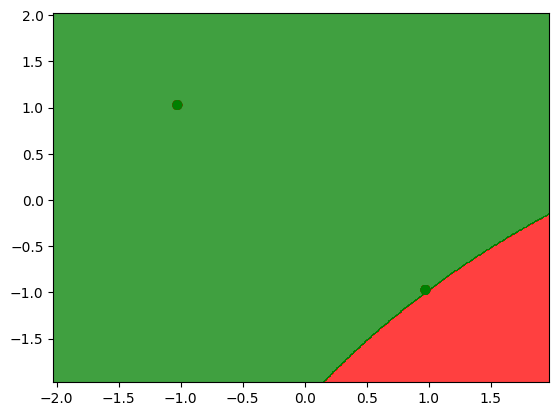

In [29]:
# Misalkan kita menggunakan fitur ke-1 dan ke-2 saja dari dataset
X_train_2features = X_train[:, [0, 1]]  # Memilih dua fitur dari X_train
X_test_2features = X_test[:, [0, 1]]

# Training ulang model dengan dua fitur tersebut
classifier = GaussianNB()
classifier.fit(X_train_2features, y_train)

# Prediksi dan visualisasi dengan meshgrid sesuai dua fitur
X1, X2 = np.meshgrid(np.arange(start = X_train_2features[:, 0].min() - 1, stop = X_train_2features[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train_2features[:, 1].min() - 1, stop = X_train_2features[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Lanjutkan dengan plot scatter data poin
plt.scatter(X_train_2features[:, 0], X_train_2features[:, 1], c=y_train, cmap=ListedColormap(('red', 'green')))
plt.show()


<ipython-input-31-0e3326cf939e>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


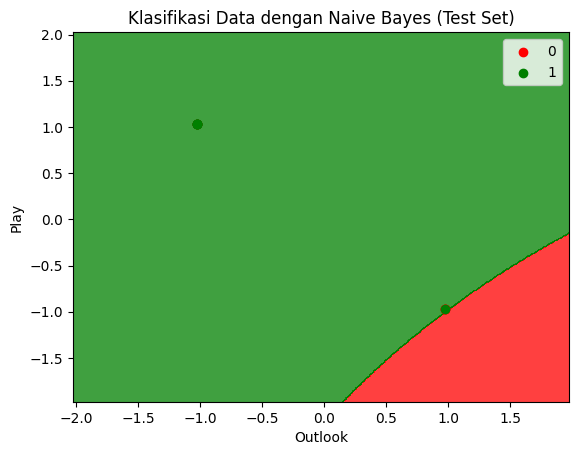

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Test Set)')
plt.xlabel('Outlook')
plt.ylabel('Play')
plt.legend()
plt.show()
